In [ ]:
# Copyright 2023, Acadential, All rights reserved.

# 9-6. Putting it together

In [17]:
import torch 
import os 
from torch import nn 
# matplotlib for plotting
import matplotlib.pyplot as plt

# Importing the model 
from src.model import NeuralNetwork

# Importing the dataloaders
from src.data import get_dataloaders

# Importing train validation loop
# 이전 실습에서 작성한 train_loop, val_loop을 가져옵니다.
from src.train_val import train_loop, val_loop



## Define and initialize the model

In [18]:
model = NeuralNetwork()

## Load dataset and create dataloader

In [19]:
train_dataloader, valid_dataloader = get_dataloaders()

## Define loss function

In [20]:
loss_fn = nn.CrossEntropyLoss()

## Define optimizer


In [21]:
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.001)

In [22]:
train_loss_history = []
valid_loss_history = []
valid_acc_history = []
epochs = 10
best_acc = 0.
os.makedirs("checkpoints", exist_ok=True)

In [23]:
for epoch in range(epochs):
    print(f"------------------Epoch {epoch} Train------------------")
    # Train Loop
    train_losses = train_loop(model, train_dataloader, loss_fn, optimizer)
    train_loss_history.extend(train_losses)
    
    print(f"------------------Epoch {epoch} Valid------------------")
    # Validation Loop
    valid_losses, valid_acc = val_loop(model, valid_dataloader, loss_fn)
    valid_loss_history.append(valid_losses)
    valid_acc_history.append(valid_acc)
    
    if valid_acc > best_acc:
        # Validation Accuracy가 Best Accuracy보다 높으면 모델 저장
        best_acc = valid_acc
        torch.save(model.state_dict(), "checkpoints/best_model.pt")

------------------Epoch 0 Train------------------


Train Loss: 2.3000: 100%|██████████| 938/938 [00:03<00:00, 311.66it/s]


------------------Epoch 0 Test------------------


Test Loss: 2.3004: 100%|██████████| 157/157 [00:01<00:00, 120.98it/s]


------------------Epoch 1 Train------------------


Train Loss: 2.2993: 100%|██████████| 938/938 [00:03<00:00, 310.52it/s]


------------------Epoch 1 Test------------------


Test Loss: 2.2981: 100%|██████████| 157/157 [00:01<00:00, 106.27it/s]


------------------Epoch 2 Train------------------


Train Loss: 2.2963: 100%|██████████| 938/938 [00:03<00:00, 302.94it/s]


------------------Epoch 2 Test------------------


Test Loss: 2.2957: 100%|██████████| 157/157 [00:01<00:00, 114.46it/s]


------------------Epoch 3 Train------------------


Train Loss: 2.2890: 100%|██████████| 938/938 [00:02<00:00, 315.72it/s]


------------------Epoch 3 Test------------------


Test Loss: 2.2933: 100%|██████████| 157/157 [00:01<00:00, 117.33it/s]


------------------Epoch 4 Train------------------


Train Loss: 2.2895: 100%|██████████| 938/938 [00:03<00:00, 292.14it/s]


------------------Epoch 4 Test------------------


Test Loss: 2.2905: 100%|██████████| 157/157 [00:01<00:00, 113.20it/s]


------------------Epoch 5 Train------------------


Train Loss: 2.2846: 100%|██████████| 938/938 [00:03<00:00, 300.89it/s]


------------------Epoch 5 Test------------------


Test Loss: 2.2874: 100%|██████████| 157/157 [00:01<00:00, 117.94it/s]


------------------Epoch 6 Train------------------


Train Loss: 2.2922: 100%|██████████| 938/938 [00:03<00:00, 311.71it/s]


------------------Epoch 6 Test------------------


Test Loss: 2.2839: 100%|██████████| 157/157 [00:01<00:00, 108.52it/s]


------------------Epoch 7 Train------------------


Train Loss: 2.2890: 100%|██████████| 938/938 [00:03<00:00, 310.30it/s]


------------------Epoch 7 Test------------------


Test Loss: 2.2801: 100%|██████████| 157/157 [00:01<00:00, 114.52it/s]


------------------Epoch 8 Train------------------


Train Loss: 2.2876: 100%|██████████| 938/938 [00:03<00:00, 284.37it/s]


------------------Epoch 8 Test------------------


Test Loss: 2.2758: 100%|██████████| 157/157 [00:01<00:00, 109.97it/s]


------------------Epoch 9 Train------------------


Train Loss: 2.2836: 100%|██████████| 938/938 [00:03<00:00, 296.10it/s]


------------------Epoch 9 Test------------------


Test Loss: 2.2708: 100%|██████████| 157/157 [00:01<00:00, 114.57it/s]


Text(0.5, 1.0, 'Train loss history')

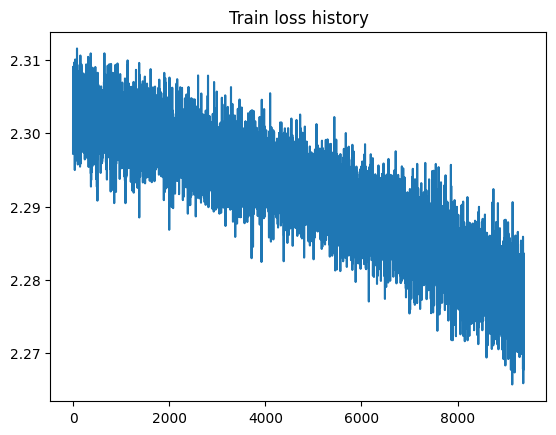

In [24]:
# Train Loss을 그래프로 그리기
plt.figure()
plt.plot(train_loss_history)
plt.title('Train loss history')

Text(0.5, 1.0, 'Test loss history')

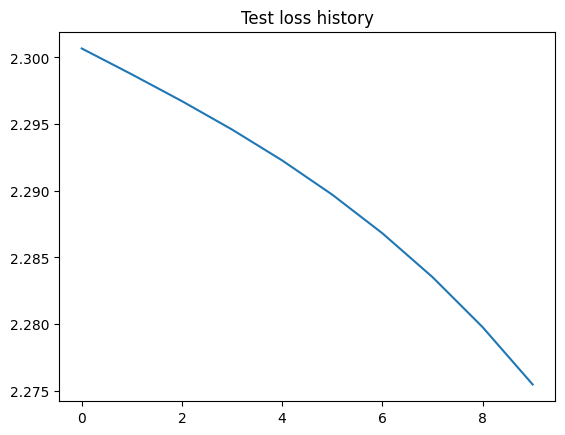

In [25]:
# Validation Loss을 그래프로 그리기
plt.figure()
plt.plot(valid_loss_history)
plt.title('Validation loss history')

Text(0.5, 1.0, 'Test accuracy history')

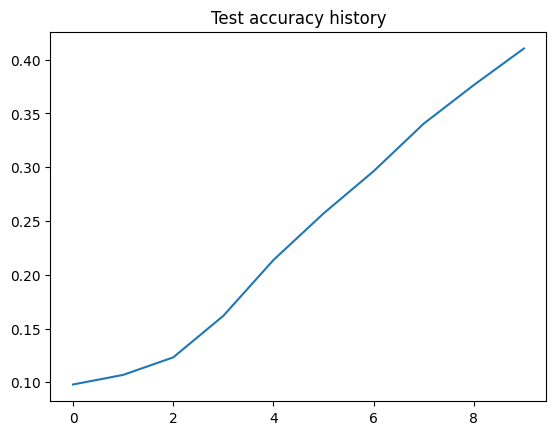

In [26]:
# Validaiton accuracy history 그래프 그리기
plt.figure()
plt.plot(valid_acc_history)
plt.title('Validation accuracy history')